In [2]:

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style="seaborn"
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load DataFrames from CSV
X_train_pca_df = pd.read_csv("X_train_pca.csv")
X_val_pca_df = pd.read_csv("X_val.csv")
X_test_pca_df = pd.read_csv("X_test.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_val = pd.read_csv("Y_val.csv")
Y_test = pd.read_csv("Y_test.csv")

In [4]:
print(
    X_train_pca_df.shape,
    X_val_pca_df.shape,
    X_test_pca_df.shape,
    Y_train.shape,
    Y_val.shape,
    Y_test.shape,
)

(104188, 20) (8485, 20) (8486, 20) (104188, 1) (8485, 1) (8486, 1)


In [5]:
#X_val_pca_df.info()
Y_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LoanStatus  8485 non-null   int64
dtypes: int64(1)
memory usage: 66.4 KB


In [6]:
import numpy as np
import pandas as pd

class LogisticRegressionImplementation:
    def __init__(self, learning_rate=0.005, num_iterations=50000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def initialize_weights(self, num_features):
        self.weights = np.zeros((num_features, 1))
        self.bias = 0
    
    def fit(self, X, y):
        m, n = X.shape
        self.initialize_weights(n)
        
        y_values = y.values if isinstance(y, pd.DataFrame) else y
        
        for i in range(self.num_iterations):
            # Forward propagation
            z = np.dot(X, self.weights) + self.bias
            A = self.sigmoid(z)
            
            # Compute cost
            cost = -1/m * np.sum(y_values * np.log(A) + (1-y_values) * np.log(1-A))
            
            # Backward propagation
            dz = A - y_values
            dw = 1/m * np.dot(X.T, dz)
            db = 1/m * np.sum(dz)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Print cost at intervals
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost}")
                
    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)



In [7]:

# Initialize and fit the logistic regression model
model = LogisticRegressionImplementation()
model.fit(X_train_pca_df, Y_train)


Iteration 0: Cost = 0.6931471805599453
Iteration 100: Cost = 0.49951769461953804
Iteration 200: Cost = 0.42775194091794944
Iteration 300: Cost = 0.3908003383661637
Iteration 400: Cost = 0.3678052710425936
Iteration 500: Cost = 0.3518113623781956


KeyboardInterrupt: 

In [8]:
# Predict probabilities
probabilities = model.predict_proba(X_test_pca_df)

# Predict class labels
predictions = model.predict(X_test_pca_df)


In [9]:
# Calculate accuracy
accuracy = (predictions == Y_test.values.flatten()).mean()

# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.5889132724129118


In [10]:
# Predict probabilities
probabilities_val = model.predict_proba(X_val_pca_df)

# Predict class labels
predictions_val = model.predict(X_val_pca_df)


In [11]:
# Calculate accuracy
accuracy_val = (predictions_val == Y_val.values.flatten()).mean()

# Print accuracy
print("Accuracy of Val set:", accuracy_val)


Accuracy of Val set: 0.5865037577144873


Iteration 0: Cost = 0.6931471805599453
Iteration 100: Cost = 0.42754704078103184
Iteration 200: Cost = 0.36770008108368146
Iteration 300: Cost = 0.3398148634643437
Iteration 400: Cost = 0.32297409333257593
Iteration 500: Cost = 0.311485483568656
Iteration 600: Cost = 0.3030804768098952
Iteration 700: Cost = 0.2966420215520082
Iteration 800: Cost = 0.29154366533002457
Iteration 900: Cost = 0.2874023558324278
Iteration 0: Cost = 0.6931471805599453
Iteration 100: Cost = 0.42754704078103184
Iteration 200: Cost = 0.36770008108368146
Iteration 300: Cost = 0.3398148634643437
Iteration 400: Cost = 0.32297409333257593
Iteration 500: Cost = 0.311485483568656
Iteration 600: Cost = 0.3030804768098952
Iteration 700: Cost = 0.2966420215520082
Iteration 800: Cost = 0.29154366533002457
Iteration 900: Cost = 0.2874023558324278
Iteration 1000: Cost = 0.2839690438952737
Iteration 1100: Cost = 0.28107419096271813
Iteration 1200: Cost = 0.27859817030027
Iteration 1300: Cost = 0.276454096798607
Iteration 14

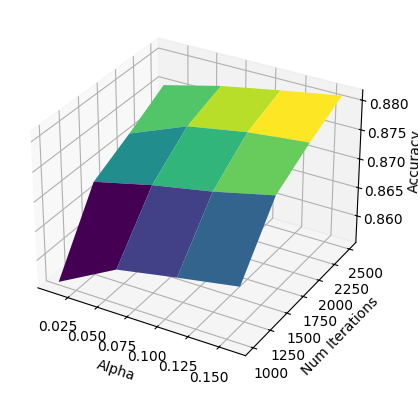

Optimal Alpha: 0.16000000000000003
Optimal Num Iterations: 2500
Max Accuracy: 0.8812021213906894


In [22]:
import numpy as np
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_accuracy(alpha, num_iter):
    model = LogisticRegressionImplementation(learning_rate=alpha, num_iterations=num_iter)
    model.fit(X_train_pca_df, Y_train)
    Y_pred = model.predict(X_val_pca_df)
    accuracy = accuracy_score(Y_val, Y_pred)
    return accuracy


alphas = np.arange(0.01, 0.2, 0.05)
num_iters = np.arange(1000, 3000, 500)

accuracies = np.zeros((len(alphas), len(num_iters)))
max_accuracy = 0
optimal_alpha = None
optimal_num_iter = None

for i, alpha in enumerate(alphas):
    for j, num_iter in enumerate(num_iters):
        accuracy = calculate_accuracy(alpha, num_iter)
        accuracies[i, j] = accuracy
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            optimal_alpha = alpha
            optimal_num_iter = num_iter

alpha_mesh, num_iter_mesh = np.meshgrid(alphas, num_iters)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_mesh, num_iter_mesh, accuracies, cmap='viridis')

ax.set_xlabel('Alpha')
ax.set_ylabel('Num Iterations')
ax.set_zlabel('Accuracy')

plt.show()

print("Optimal Alpha:", optimal_alpha)
print("Optimal Num Iterations:", optimal_num_iter)
print("Max Accuracy:", max_accuracy)


In [16]:
max_accuracy

0.8921626399528579

In [17]:
optimal_alpha

0.26

In [18]:
optimal_num_iter

4500

In [19]:
from sklearn.metrics import f1_score



# Calculate F1 score
f1 = f1_score(Y_test, predictions, average='weighted')

# Print F1 score
print("F1 Score:", f1)



F1 Score: 0.8523206325236404


Text(0.5, 1.0, 'Confusion Matrix')

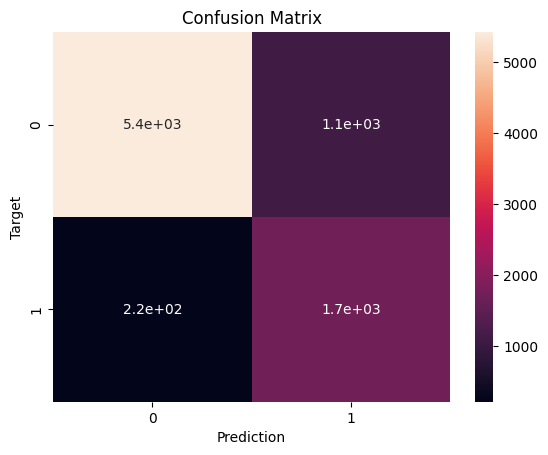

In [20]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test,predictions)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      6533
           1       0.61      0.89      0.72      1953

    accuracy                           0.84      8486
   macro avg       0.79      0.86      0.81      8486
weighted avg       0.88      0.84      0.85      8486

